## Actividad Final
#### Jeremy Eduardo Andres Jerez Barona

Online sales: Datos de ventas online. Sugerencia, consolidar un solo dataframe mediante un merge con la variable identificador.

**Orders.csv contains :**
Order ID (primary key), Order Date, CustomerName, State, City ->Customer details.
Order ID
Order date
CustomerName
State
City

**Details.csv contains:**
Order ID (primary key) and the details of all the subsequent orders within the Orders.csv
Order ID
Amount
Profit
Quantity
Category
Sub-category
Payment

In [1]:
#! pip install chardet
#! pip install pandas

In [2]:
import pandas as pd
#import chardet
#pd.set_option('display.max_columns', None)

In [3]:
Orders_db = pd.read_csv(r"C:\Users\Jedan\Downloads\OTROS\orders.csv")
Orders_db

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore
...,...,...,...,...,...
495,B-25742,03-08-2018,Ashwin,Goa,Goa
496,B-26088,26-03-2018,Bhavna,Sikkim,Gangtok
497,B-25707,01-07-2018,Shivani,Maharashtra,Mumbai
498,B-25758,22-08-2018,Shubham,Himachal Pradesh,Simla


In [4]:
# Filtrar el DataFrame por un Order ID específico
df_filtrado = Orders_db[Orders_db['Order ID'] == 'B-26055']
df_filtrado

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura


In [5]:
Details_db = pd.read_csv(r"C:\Users\Jedan\Downloads\OTROS\Details.csv")
Details_db

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card
...,...,...,...,...,...,...,...
1495,B-25700,7,-3,2,Clothing,Hankerchief,COD
1496,B-25757,3151,-35,7,Clothing,Trousers,EMI
1497,B-25973,4141,1698,13,Electronics,Printers,COD
1498,B-25698,7,-2,1,Clothing,Hankerchief,COD


In [6]:
# Filtrar el DataFrame por un Order ID específico
df_filtrado = Details_db[Details_db['Order ID'] == 'B-26055']
df_filtrado

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
1,B-26055,5729,64,14,Furniture,Chairs,EMI
190,B-26055,671,114,9,Electronics,Phones,Credit Card
218,B-26055,443,11,1,Clothing,Saree,COD
392,B-26055,57,7,2,Clothing,Shirt,UPI
394,B-26055,227,48,5,Clothing,Stole,COD
428,B-26055,213,4,14,Clothing,Shirt,COD
718,B-26055,94,27,2,Clothing,T-shirt,COD
1436,B-26055,1250,-12,2,Electronics,Printers,EMI
1454,B-26055,1218,-420,8,Furniture,Bookcases,COD


### Verificar tipos de datos

In [7]:
Orders_db.dtypes

Order ID        object
Order Date      object
CustomerName    object
State           object
City            object
dtype: object

In [8]:
Details_db.dtypes

Order ID        object
Amount           int64
Profit           int64
Quantity         int64
Category        object
Sub-Category    object
PaymentMode     object
dtype: object

## Cruzar las bases de Orders con la de Details.

In [9]:
coincidencias = set(Orders_db['Order ID']).intersection(set(Details_db['Order ID']))
print(f"Coincidencias encontradas: {len(coincidencias)}")

Coincidencias encontradas: 500


#### Realizaremos un merge usando pd.merge

In [10]:
# Realizar el merge de los DataFrames filtrados
df_merged = pd.merge(Orders_db, Details_db, on='Order ID', how='inner')

# Mostrar el resultado del merge
df_merged



,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,5729,64,14,Furniture,Chairs,EMI
1,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,671,114,9,Electronics,Phones,Credit Card
2,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,443,11,1,Clothing,Saree,COD
3,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,57,7,2,Clothing,Shirt,UPI
4,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,227,48,5,Clothing,Stole,COD
...,...,...,...,...,...,...,...,...,...,...,...
1495,B-25742,03-08-2018,Ashwin,Goa,Goa,11,-8,2,Clothing,Skirt,UPI
1496,B-26088,26-03-2018,Bhavna,Sikkim,Gangtok,11,5,2,Clothing,Hankerchief,UPI
1497,B-25707,01-07-2018,Shivani,Maharashtra,Mumbai,8,-6,1,Clothing,Stole,COD
1498,B-25758,22-08-2018,Shubham,Himachal Pradesh,Simla,8,-2,1,Clothing,Stole,COD


### Analizaremos valores unicos

In [11]:
filas_i, columnas_i = df_merged.shape
print(f"Numero de filas: {filas_i}")
print(f"Numero de columnas: {columnas_i}")

#Opcion 1
Valores_unicos = df_merged.nunique()
#print(f"\nValores unicos de cada columna:\n{Valores_unicos}")

#Opcion 2 con proporcion de valores unicos sobre el total
summario_df = pd.DataFrame({
    'Valores Unicos': Valores_unicos,
    'Total de registros': [filas_i] * columnas_i
})
summario_df['% de valores unicos'] = (summario_df['Valores Unicos'] / summario_df['Total de registros']) * 100
summario_df

Numero de filas: 1500
Numero de columnas: 11


,Valores Unicos,Total de registros,% de valores unicos
Order ID,500,1500,33.333333
Order Date,307,1500,20.466667
CustomerName,336,1500,22.400000
State,19,1500,1.266667
City,25,1500,1.666667
Amount,590,1500,39.333333
Profit,406,1500,27.066667
Quantity,14,1500,0.933333
Category,3,1500,0.200000
Sub-Category,17,1500,1.133333


### Valores Nulos

In [12]:
nulos_df = df_merged.isnull().sum()

# Calculo de porcentaje de nulos en cada columna
nulos_df_Porcentaje = (nulos_df / len(df_merged)) * 100
nulos_summary = pd.DataFrame({
    'Valores Nulos': nulos_df,
    'Porcentaje Null': nulos_df_Porcentaje
})

# Ordenar por nulos
nulos_summary = nulos_summary.sort_values(by='Valores Nulos', ascending=False)
nulos_summary

,Valores Nulos,Porcentaje Null
Order ID,0,0.0
Order Date,0,0.0
CustomerName,0,0.0
State,0,0.0
City,0,0.0
Amount,0,0.0
Profit,0,0.0
Quantity,0,0.0
Category,0,0.0
Sub-Category,0,0.0


In [13]:
#Eliminar filas con valores nulos y modificar el DataFrame original
df_merged.dropna(inplace=True)

In [14]:
#validamos tipo de datos actual
df_merged.dtypes

Order ID        object
Order Date      object
CustomerName    object
State           object
City            object
Amount           int64
Profit           int64
Quantity         int64
Category        object
Sub-Category    object
PaymentMode     object
dtype: object

#### *Limpieza con if en el DF*

Dado que tenemos la columna de identificacion de la orden con el prefijo B- vamos a eliminar estos valores con una iteracion

### Limpieza iterativa por columnas

In [15]:
# Seleccionar columnas para reemplazar
columnas_reemplazo = ['Order ID']

# Iteracion y remplazo de simbolo "-"
for col in columnas_reemplazo:
    df_merged[col] = df_merged[col].str.replace("B-", "")

# Reemplazo de puntos por comas opcional
#columnas_valores = ['Order ID']
#for col in columnas_valores:
#    df_merged[col] = df_merged[col].str.replace(".", ",")

df_merged

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,5729,64,14,Furniture,Chairs,EMI
1,26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,671,114,9,Electronics,Phones,Credit Card
2,26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,443,11,1,Clothing,Saree,COD
3,26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,57,7,2,Clothing,Shirt,UPI
4,26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,227,48,5,Clothing,Stole,COD
...,...,...,...,...,...,...,...,...,...,...,...
1495,25742,03-08-2018,Ashwin,Goa,Goa,11,-8,2,Clothing,Skirt,UPI
1496,26088,26-03-2018,Bhavna,Sikkim,Gangtok,11,5,2,Clothing,Hankerchief,UPI
1497,25707,01-07-2018,Shivani,Maharashtra,Mumbai,8,-6,1,Clothing,Stole,COD
1498,25758,22-08-2018,Shubham,Himachal Pradesh,Simla,8,-2,1,Clothing,Stole,COD


### Transformacion de formato iterativo por columnas

Identificación y transformación del tipo de dato.

In [16]:
columnas_a_verificar = ['Order ID']

# Convertir las columnas a numéricas, ignorando los errores
for col in columnas_a_verificar:
    df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')

# Filtro para mantener solo las filas con valores numéricos
filtro_numerico = df_merged[columnas_a_verificar].notnull().all(axis=1)

# Filtro al DataFrame original para eliminar las filas con valores no numéricos
df_final = df_merged[filtro_numerico]

df_final

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,5729,64,14,Furniture,Chairs,EMI
1,26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,671,114,9,Electronics,Phones,Credit Card
2,26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,443,11,1,Clothing,Saree,COD
3,26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,57,7,2,Clothing,Shirt,UPI
4,26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura,227,48,5,Clothing,Stole,COD
...,...,...,...,...,...,...,...,...,...,...,...
1495,25742,03-08-2018,Ashwin,Goa,Goa,11,-8,2,Clothing,Skirt,UPI
1496,26088,26-03-2018,Bhavna,Sikkim,Gangtok,11,5,2,Clothing,Hankerchief,UPI
1497,25707,01-07-2018,Shivani,Maharashtra,Mumbai,8,-6,1,Clothing,Stole,COD
1498,25758,22-08-2018,Shubham,Himachal Pradesh,Simla,8,-2,1,Clothing,Stole,COD


In [17]:
df_final.dtypes

Order ID         int64
Order Date      object
CustomerName    object
State           object
City            object
Amount           int64
Profit           int64
Quantity         int64
Category        object
Sub-Category    object
PaymentMode     object
dtype: object

## Filtro de base

In [18]:
#Contar los registros por 'State'
conteo_por_estado = df_final['State'].value_counts()
print(conteo_por_estado)


State
Madhya Pradesh       314
Maharashtra          299
Uttar Pradesh         87
Gujarat               87
Delhi                 76
Rajasthan             74
West Bengal           63
Bihar                 62
Punjab                60
Karnataka             50
Jammu and Kashmir     49
Kerala                45
Nagaland              45
Goa                   43
Andhra Pradesh        42
Himachal Pradesh      29
Haryana               26
Tamil Nadu            25
Sikkim                24
Name: count, dtype: int64


Filtro por departamento especifico

In [19]:
# Filtrar el DataFrame por un estado específico
df_filtrado_por_estado = df_final[df_final['State'] == 'Madhya Pradesh']
df_filtrado_por_estado



,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
25,25757,21-08-2018,Vishakha,Madhya Pradesh,Indore,17,-13,4,Clothing,Skirt,Debit Card
26,25757,21-08-2018,Vishakha,Madhya Pradesh,Indore,46,14,5,Clothing,Skirt,Debit Card
27,25757,21-08-2018,Vishakha,Madhya Pradesh,Indore,211,19,8,Clothing,Stole,COD
28,25757,21-08-2018,Vishakha,Madhya Pradesh,Indore,165,30,3,Clothing,Stole,COD
29,25757,21-08-2018,Vishakha,Madhya Pradesh,Indore,34,-11,5,Clothing,T-shirt,COD
...,...,...,...,...,...,...,...,...,...,...,...
1461,25783,15-09-2018,Shivangi,Madhya Pradesh,Indore,21,-17,3,Clothing,Shirt,COD
1463,25690,15-06-2018,Gunjan,Madhya Pradesh,Indore,31,-10,3,Clothing,Skirt,COD
1467,25907,11-12-2018,Jaydeep,Madhya Pradesh,Bhopal,30,11,5,Clothing,Hankerchief,COD
1468,25719,12-07-2018,Rashmi,Madhya Pradesh,Indore,29,10,2,Clothing,Stole,COD


## Graficación de las variables.

##### Grafica stacked para mostrar las categorias con mas ventas, con la cantidad de ocurrencias de cada categoria por estado

In [20]:
# Agrupar por Estado y Categoría, contando las ocurrencias de cada categoría
df_grouped = df_final.groupby(['State', 'Category']).size().reset_index(name='Count')

df_grouped.head()

,State,Category,Count
0,Andhra Pradesh,Clothing,25
1,Andhra Pradesh,Electronics,11
2,Andhra Pradesh,Furniture,6
3,Bihar,Clothing,37
4,Bihar,Electronics,18


In [21]:
#! pip install nbformat

### Comentar las siguientes lineas en caso de querer correr en local


In [22]:
#import plotly.io as pio

#En caso de que se desee visualizar en el navegador
#pio.renderers.default = 'browser' 
#fig.show()

## Plotly

In [23]:
import plotly.express as px

# Crear el gráfico de barras apiladas
fig = px.bar(df_grouped, 
             x='State', 
             y='Count', 
             color='Category', 
             title='Categorías con más ventas por Estado', 
             labels={'Count': 'Cantidad de Ocurrencias', 'State': 'Estado'},
             barmode='stack')

# Mostrar la gráfica
fig.show()


## Matplotlib

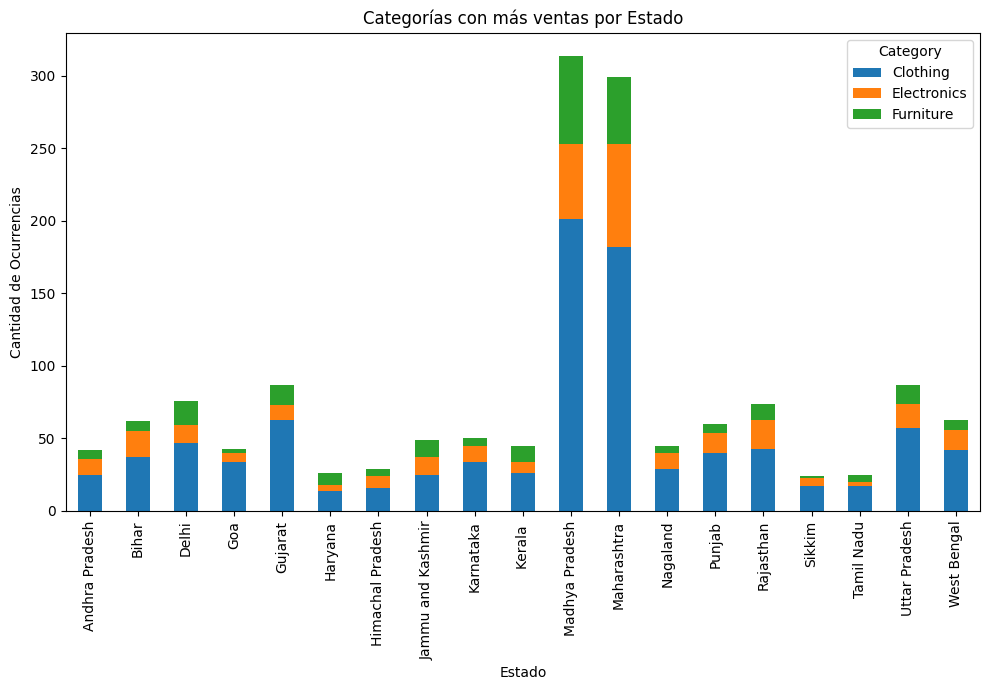

In [24]:
import matplotlib.pyplot as plt

# Crear una tabla pivote para preparar los datos
df_pivot = df_final.pivot_table(index='State', columns='Category', aggfunc='size', fill_value=0)

# Crear el gráfico de barras apiladas
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 7))

# Añadir títulos y etiquetas
plt.title('Categorías con más ventas por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Ocurrencias')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


##### Grafica de dona para seleccionar las 10 Sub-Categorias que generan mas ganancia


In [25]:
# Agrupar por Sub-Categoria y sumar las ganancias
df_grouped = df_final.groupby('Sub-Category').agg({'Profit': 'sum', 'Amount': 'sum'}).reset_index()
df_grouped

,Sub-Category,Profit,Amount
0,Accessories,3353,21728
1,Bookcases,6516,56861
2,Chairs,1627,34222
3,Electronic Games,-644,39168
4,Furnishings,-806,13484
5,Hankerchief,1823,14294
6,Kurti,-401,3361
7,Leggings,-130,2106
8,Phones,1847,46119
9,Printers,8606,59252


In [26]:
# Seleccionar las 10 Sub-Categorias con mayor ganancia
top_10 = df_grouped.sort_values(by='Profit', ascending=False).head(10)
top_10

,Sub-Category,Profit,Amount
9,Printers,8606,59252
1,Bookcases,6516,56861
10,Saree,4057,59094
0,Accessories,3353,21728
15,Tables,3139,22614
16,Trousers,2847,30039
13,Stole,2431,18546
8,Phones,1847,46119
5,Hankerchief,1823,14294
2,Chairs,1627,34222


In [27]:
# Gráfico de donut
fig = px.pie(top_10, 
             names='Sub-Category', 
             values='Profit', 
             title='Top Sub-Categorías con mejores ganancias',
             hole=0.6)  # Agujero en el centro para hacer un gráfico de donut

# Mostrar la gráfica
fig.show()

## Matplotlib

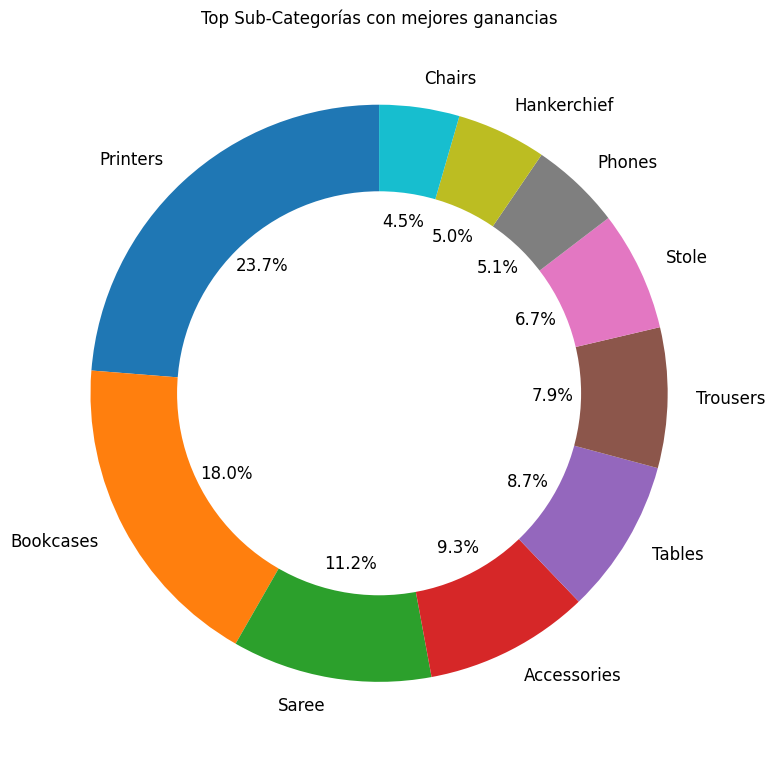

In [28]:
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(top_10['Profit'], labels=top_10['Sub-Category'], autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

for text in texts + autotexts:
    text.set_fontsize(12)

plt.title('Top Sub-Categorías con mejores ganancias')

plt.tight_layout()
plt.show()

### Finalmente un grafico de lineas para visualizar revenue total a travez de los meses

In [29]:
# Validar Columna 'Order Date' de tipo datetime
df_final['Order Date'] = pd.to_datetime(df_final['Order Date'], format='%d-%m-%Y')

# Crear Columna 'Month-Year' para agrupar por mes y año
df_final['Month-Year'] = df_final['Order Date'].dt.to_period('M')

# Agrupar por 'Month-Year' y sumar el 'Amount' (revenue total)
df_revenue_monthly = df_final.groupby('Month-Year')['Amount'].sum().reset_index()

# Convertir 'Month-Year' de Period a datetime
df_revenue_monthly['Month-Year'] = df_revenue_monthly['Month-Year'].dt.to_timestamp()
df_revenue_monthly

,Month-Year,Amount
0,2018-01-01,61632
1,2018-02-01,38962
2,2018-03-01,60694
3,2018-04-01,34330
4,2018-05-01,29093
5,2018-06-01,23658
6,2018-07-01,12966
7,2018-08-01,31492
8,2018-09-01,27283
9,2018-10-01,31613


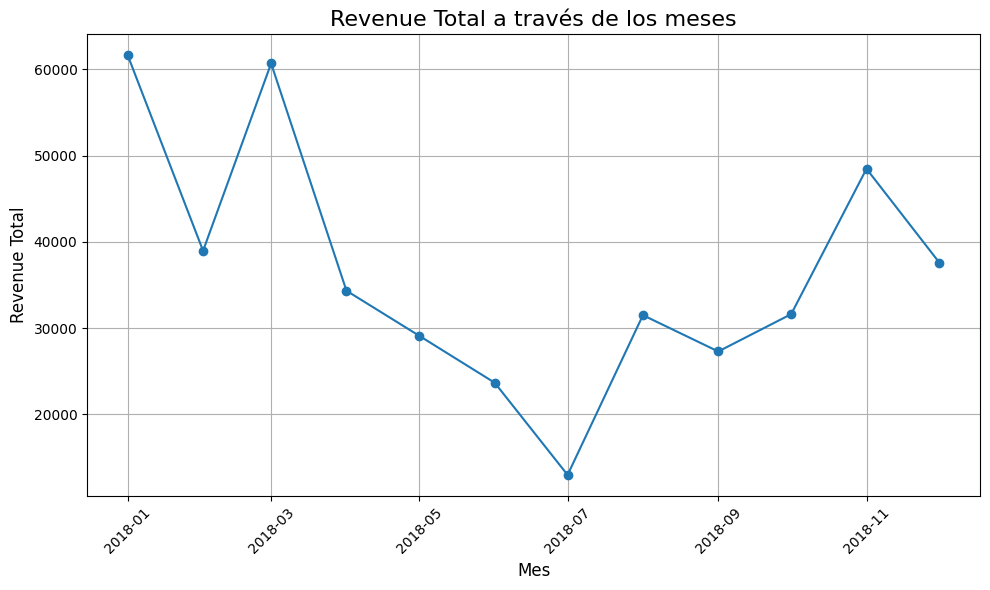

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df_revenue_monthly['Month-Year'], df_revenue_monthly['Amount'], marker='o')

# Añadir títulos y etiquetas
plt.title('Revenue Total a través de los meses', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Revenue Total', fontsize=12)

# Mejorar la visualización de las fechas en el eje X
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### CONCLUSIONES

### Las dos bases de datos tenian una estructura muy organizada y fue facil realizar el merge, la informacion es clara y no se requirio demasiada limpieza
### Todo lo aprendido en las tutorias fue fundamental para poder desarrollar esta guia, las explicaciones y cada ejemplo han sido aprovechados de la mejor manera posible, y corroborando que un buen preprocesamiento de la informacion en clave para obtener insights claros y precisos